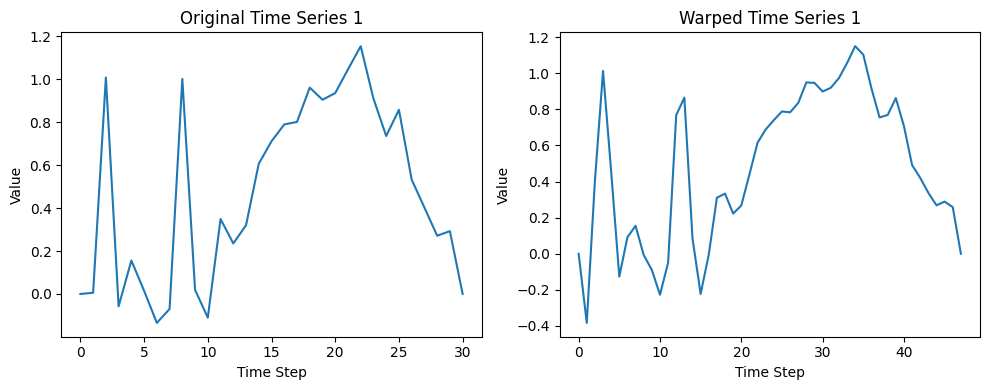

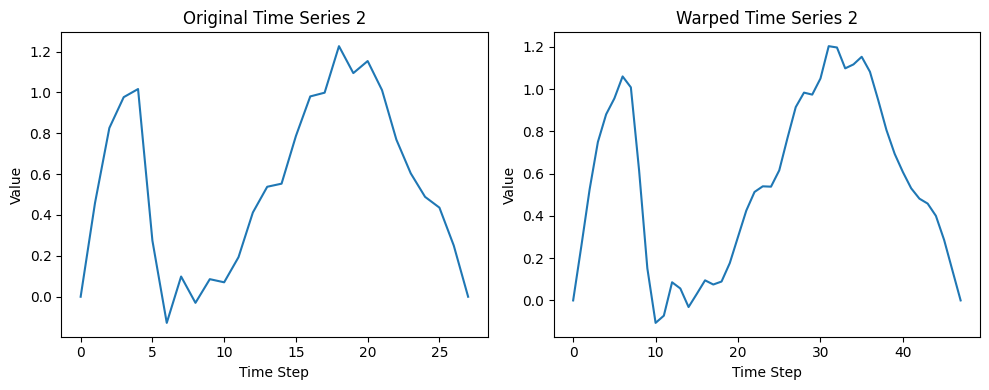

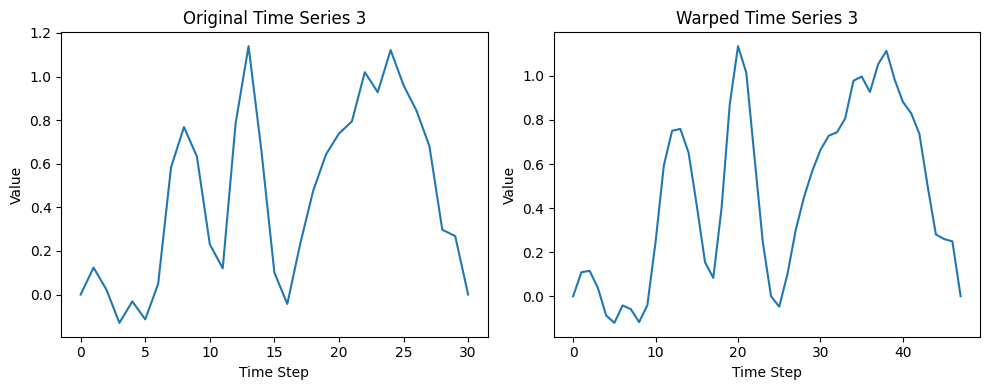

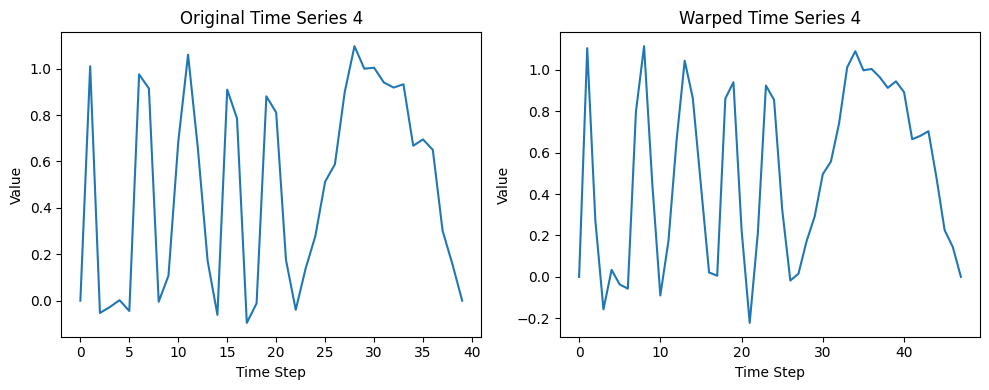

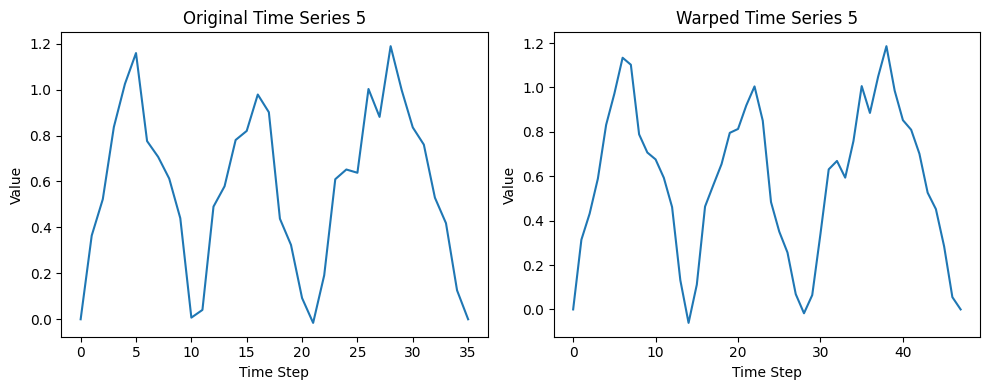

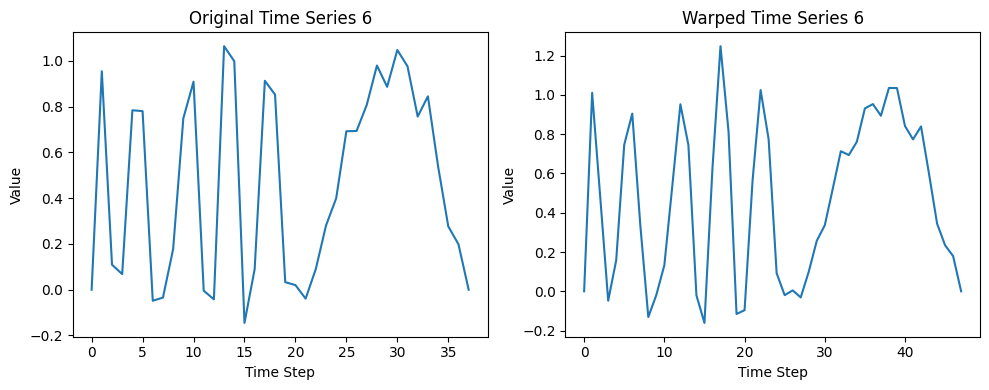

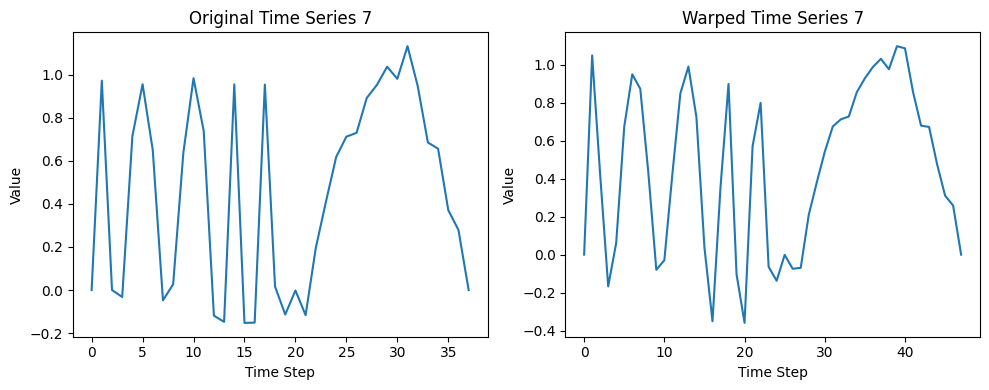

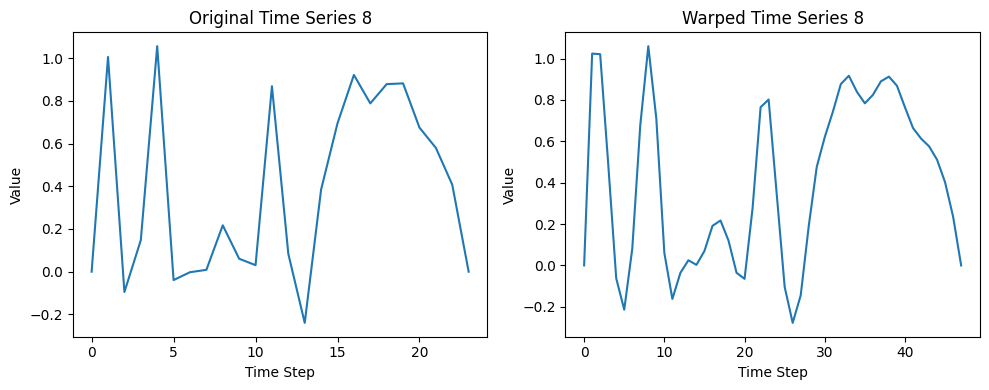

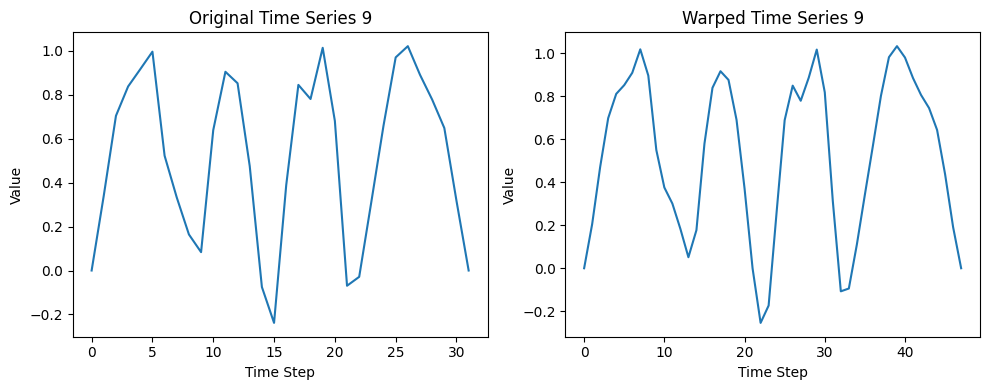

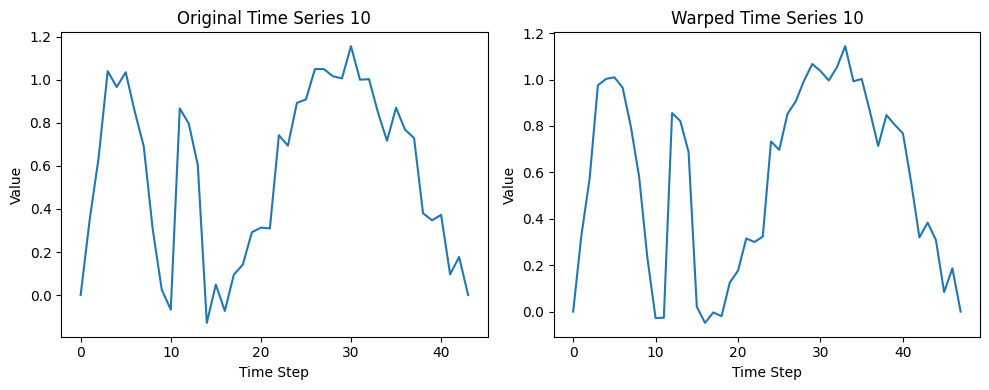

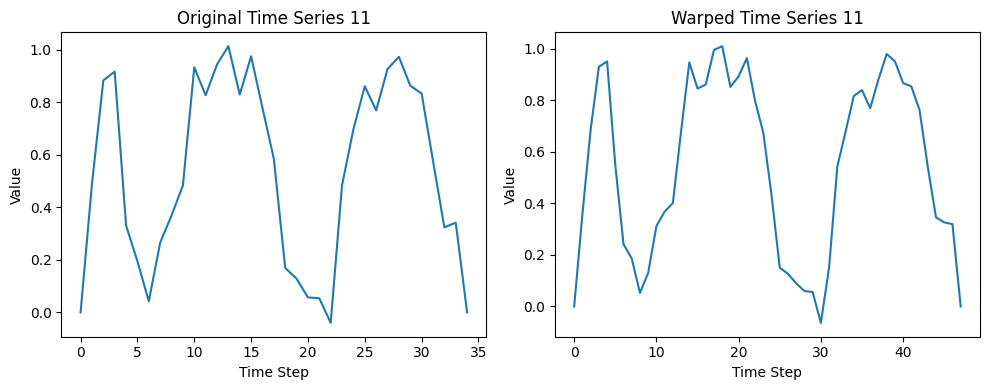

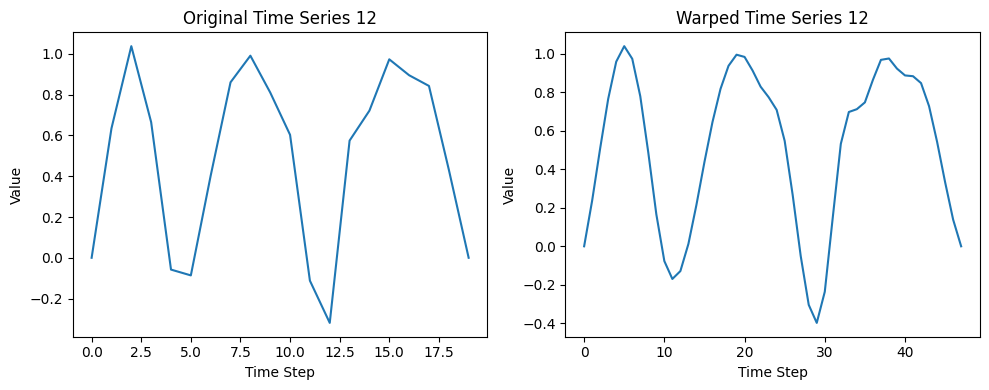

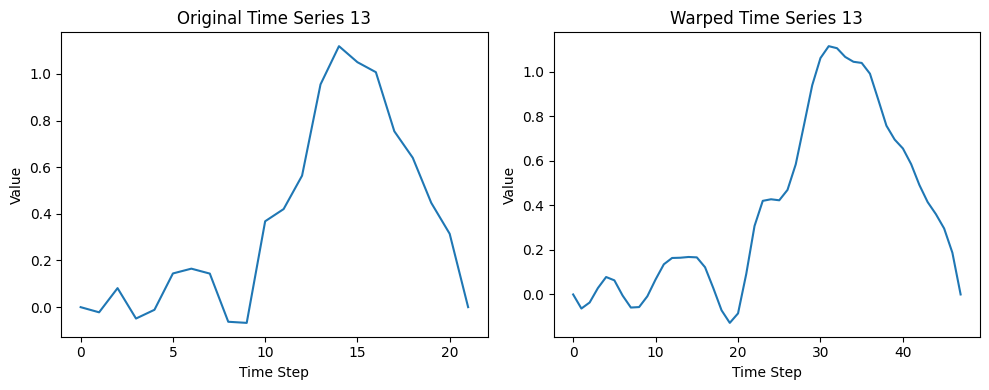

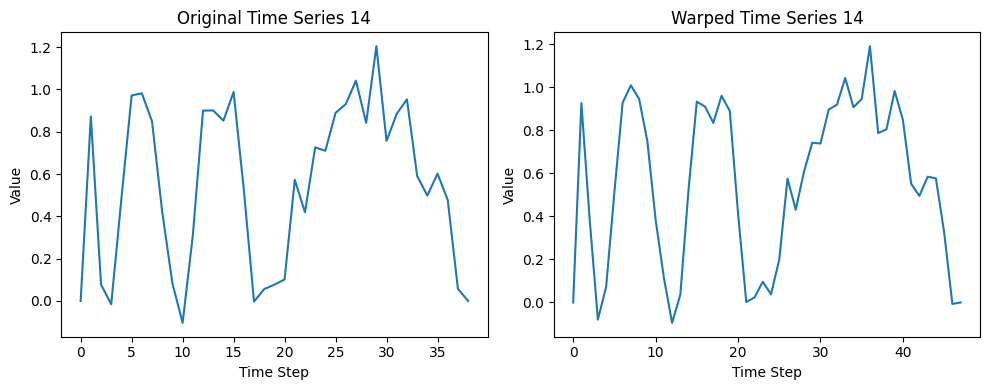

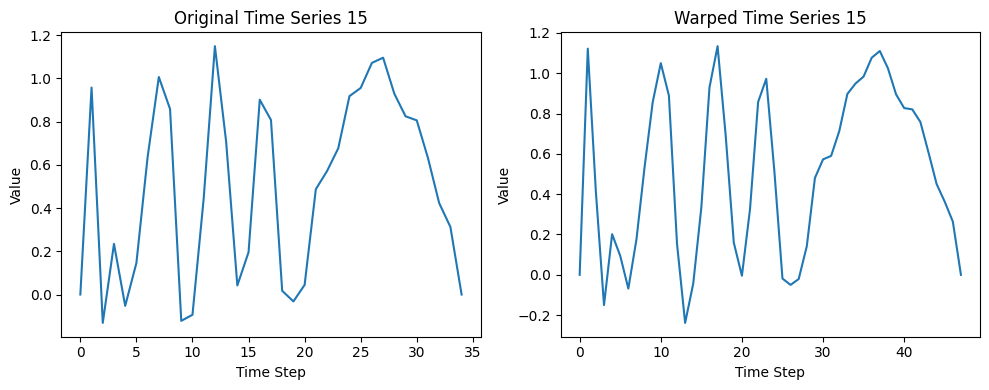

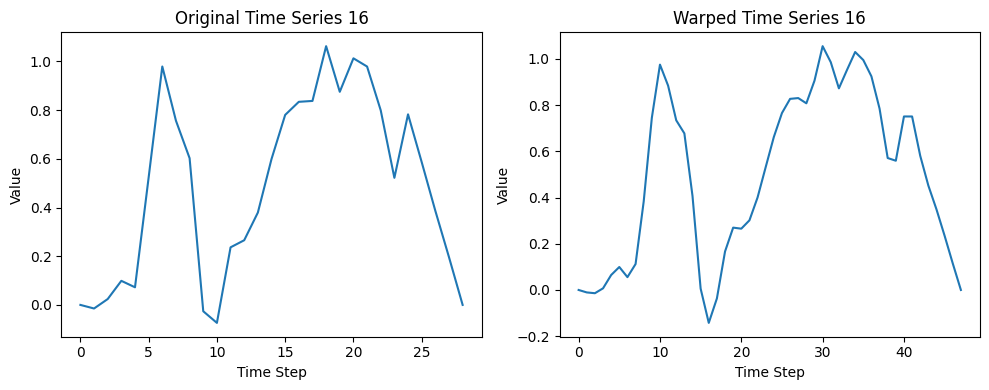

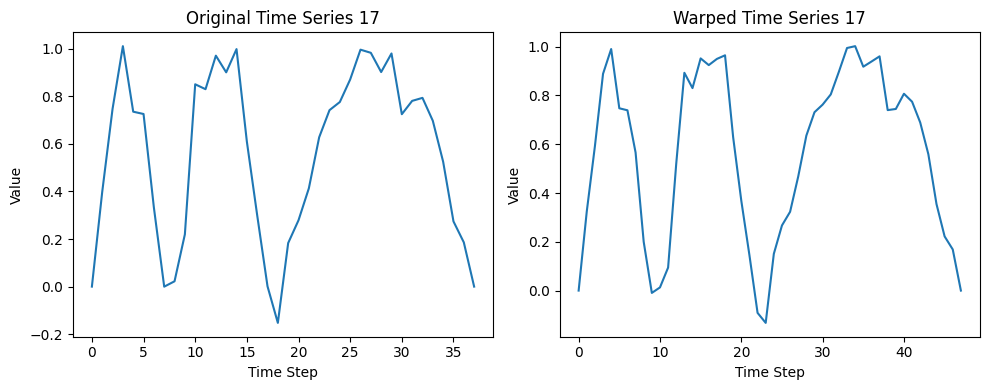

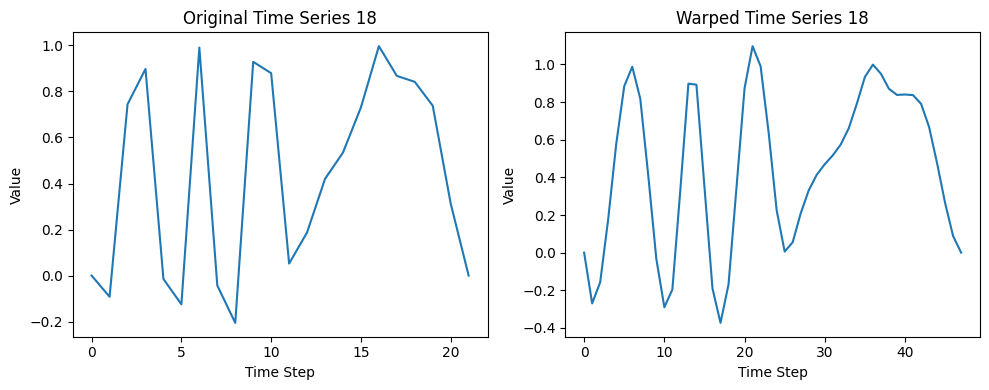

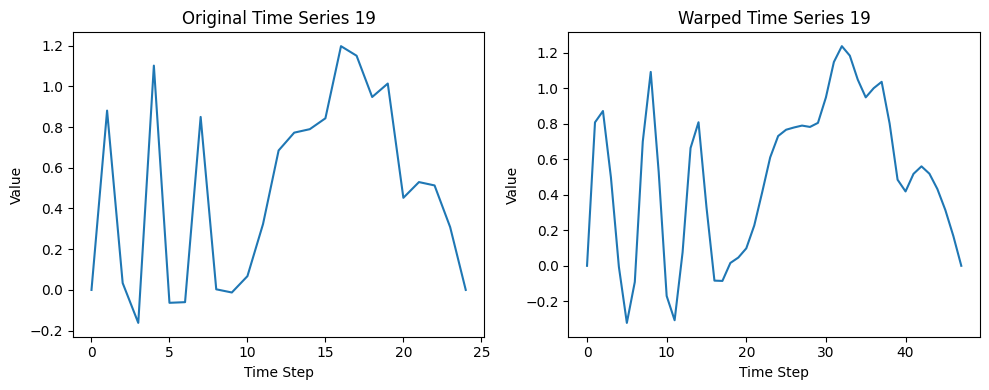

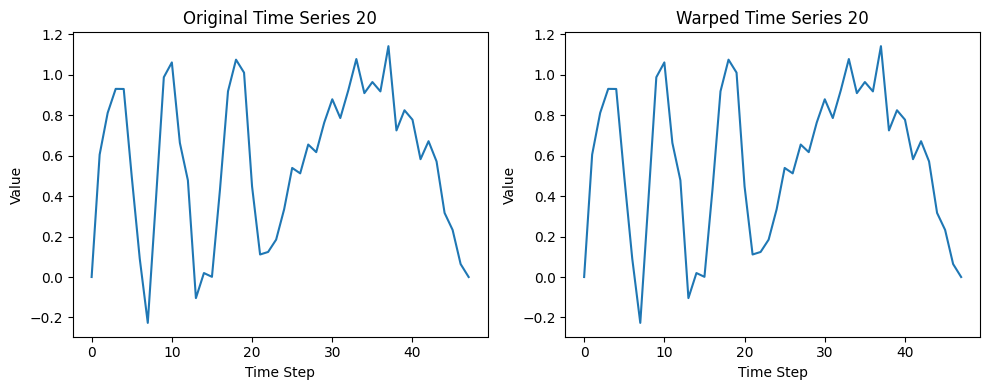

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.interpolate import interp1d

# Generate 20 time series with a random number of cycles between 3 and 7
num_series = 20  # Number of time series to generate
lengths = np.random.randint(20, 50, num_series)  # Varied lengths for each series
cycle_counts = np.random.randint(2, 8, num_series)  # Random cycles between 3 and 7

variable_cycle_time_series = []

for length, cycles in zip(lengths, cycle_counts):
    # Generate random cycle lengths that sum up to the series length
    cycle_lengths = np.random.randint(1, int(length / cycles), cycles)
    cycle_lengths = np.append(cycle_lengths, length - sum(cycle_lengths)).clip(min=1)

    # Generate sinusoidal sections with these random cycle lengths
    series = []
    for cycle_length in cycle_lengths:
        x = np.linspace(0, np.pi, cycle_length)  # Half-cycle (up/down)
        cycle = np.sin(x) + 0.1 * np.random.randn(cycle_length)  # Add some noise
        series.extend(cycle)

    # Ensure the series has the exact target length, starts, and ends at 0
    series = np.array(series[:length])
    series[0] = 0
    series[-1] = 0
    variable_cycle_time_series.append(series)


def dtw_distance(ts1, ts2):
    """Calculates the Dynamic Time Warping (DTW) distance between two time series."""
    n, m = len(ts1), len(ts2)
    dtw_matrix = np.zeros((n + 1, m + 1))
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[1:, 0] = np.inf
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(ts1[i - 1] - ts2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    return dtw_matrix[n, m]

# Find the longest time series
max_length = max(len(series) for series in variable_cycle_time_series)

# Warp the time series to the longest length using interpolation
warped_series = []
for series in variable_cycle_time_series:
    # Create interpolation function
    f = interp1d(np.linspace(0, 1, len(series)), series, kind='cubic')
    # Interpolate to the max length
    warped_series.append(f(np.linspace(0, 1, max_length)))

# Plot the original and warped time series for comparison
for i, (original, warped) in enumerate(zip(variable_cycle_time_series, warped_series)):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(original)
    plt.title(f"Original Time Series {i+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")

    plt.subplot(1, 2, 2)
    plt.plot(warped)
    plt.title(f"Warped Time Series {i+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")

    plt.tight_layout()
    plt.show()